# Predicting Fish in the Market

In [1]:
# importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
# importing dataset

data = pd.read_csv('datasets/archive (1)/Fish.csv')

In [311]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [313]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [314]:
data.shape

(159, 7)

In [315]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [316]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']], data.Species, test_size=0.2, random_state=1)

In [317]:
X_train.head()

,Weight,Length1,Length2,Length3,Height,Width
111,840.0,32.5,35.0,37.3,11.4884,7.7957
131,300.0,34.8,37.3,39.8,6.2884,4.0198
58,540.0,28.5,31.0,34.0,10.7440,6.5620
102,300.0,25.2,27.3,28.7,8.3230,5.1373
47,160.0,21.1,22.5,25.0,6.4000,3.8000


In [318]:
y_train.head()

111        Perch
131         Pike
58     Whitefish
102        Perch
47         Roach
Name: Species, dtype: object

In [319]:
X_train.shape

(127, 6)

In [320]:
y_train.unique()

array(['Perch', 'Pike', 'Whitefish', 'Roach', 'Parkki', 'Bream', 'Smelt'],
      dtype=object)

In [321]:
X_train.isnull().sum()

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [322]:
y_train.isnull().sum()

0

<AxesSubplot:>

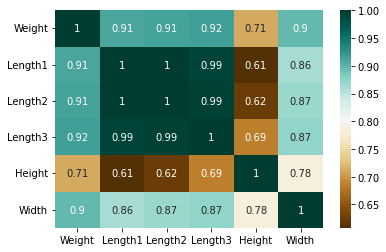

In [323]:
c = X_train.corr()
sns.heatmap(c, cmap='BrBG', annot=True)

In [402]:
X_train_copy = X_train.copy()

X_train.drop(['Height'], axis=1, inplace=True)
X_train.head()

,Weight,Length1,Width
111,840.0,32.5,7.7957
131,300.0,34.8,4.0198
58,540.0,28.5,6.5620
102,300.0,25.2,5.1373
47,160.0,21.1,3.8000


In [403]:
cat_cols = ['Species'] # categorical columns
num_cols = ['Length1', 'Weight', 'Width'] # numerical columns

In [404]:
from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# species_encoded = le.fit_transform(y_train)
# y_train = species_encoded.copy()

In [405]:
# Making pipeline for pre-processing data

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numericalTransformer = SimpleImputer(strategy='most_frequent')

OHencoder = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', numericalTransformer, num_cols)
#         ('cat', columnTransformer, cat_cols)
    ]
)

In [540]:
# selecting model for my data
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, random_state=0)
clf = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)
# clf = DecisionTreeClassifier(criterion='entropy' ,min_samples_split=50, random_state=1)

In [541]:
# making my pipeline for preprocessing and training

my_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('model', clf)
    ]
)

In [542]:
# training the model

my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Length1', 'Weight',
                                                   'Width'])])),
                ('model',
                 RandomForestClassifier(criterion='entropy', n_estimators=10,
                                        random_state=1))])

In [543]:
X_test.head()

,Weight,Length1,Length2,Length3,Height,Width
29,1000.0,33.5,37.0,42.6,18.9570,6.6030
42,120.0,19.4,21.0,23.7,6.1146,3.2943
14,600.0,29.4,32.0,37.2,14.9544,5.1708
91,130.0,20.5,22.5,24.0,5.8560,3.6240
81,85.0,18.2,20.0,21.0,5.0820,2.7720


In [544]:
preds = my_pipeline.predict(X_test[['Weight', 'Length1', 'Width']])

In [545]:
preds

array(['Bream', 'Perch', 'Bream', 'Perch', 'Perch', 'Bream', 'Roach',
       'Bream', 'Perch', 'Roach', 'Perch', 'Perch', 'Smelt', 'Perch',
       'Perch', 'Perch', 'Parkki', 'Bream', 'Perch', 'Perch', 'Smelt',
       'Parkki', 'Perch', 'Bream', 'Perch', 'Bream', 'Bream', 'Smelt',
       'Pike', 'Roach', 'Perch', 'Perch'], dtype=object)

In [546]:
# Scores
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.71875

In [572]:

test_df = pd.DataFrame(np.array([40, 30, 15]).reshape(1,3), columns = 
                      ['Weight', 'Length1', 'Width'])
test_df

,Weight,Length1,Width
0,40,30,15


In [573]:
my_pipeline.predict(test_df)[0]

'Perch'